In [6]:
!python -m pip install -U pip
!python -m pip install pandas numpy yfinance statsmodels
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm

In [7]:
data = [
    [1, "Microsoft Corp", "MSFT", "Activision Blizzard", "2022-01-18"],
    [2, "Broadcom Inc.", "AVGO", "VMware", "2022-05-26"],
    [3, "Exxon Mobil Corp", "XOM", "Pioneer Natural Resources", "2023-10-11"],
    [4, "Chevron Corp", "CVX", "Hess Corporation", "2023-10-23"],
    [5, "Anheuser-Busch InBev", "BUD", "SABMiller", "2015-09-15"],
    [6, "AT&T Inc.", "T", "Time Warner", "2016-10-22"],
    [7, "S&P Global Inc.", "SPGI", "IHS Markit", "2020-11-30"],
    [8, "United Technologies", "UTX", "Raytheon", "2019-06-09"],
    [9, "Dow Inc.", "DOW", "DuPont", "2015-12-11"],
    [10, "Exxon Corp", "XOM", "Mobil", "1998-12-01"],
    [11, "Citicorp", "C", "Travelers Group", "1998-04-06"],
    [12, "Glaxo Wellcome", "GSK", "SmithKline Beecham", "2000-01-17"],
    [13, "Pfizer Inc.", "PFE", "Warner-Lambert", "1999-11-04"],
    [14, "Verizon Communications", "VZ", "Vodafone (45% Verizon Wireless)", "2013-09-02"],
    [15, "Vodafone Group", "VOD", "Mannesmann", "1999-11-14"],
    [16, "Royal Dutch Shell", "SHEL", "BG Group", "2015-04-08"],
    [17, "Comcast Corp", "CMCSA", "Sky plc", "2018-04-25"],
    [18, "The Walt Disney Company", "DIS", "21st Century Fox (assets)", "2017-12-14"],
    [19, "Oracle Corp", "ORCL", "Cerner", "2021-12-20"],
    [20, "Salesforce Inc.", "CRM", "Slack Technologies", "2020-12-01"],
    [21, "NVIDIA Corp*", "NVDA", "Arm Holdings", "2020-09-13"],
    [22, "Dell Technologies", "DELL", "EMC Corp", "2015-10-12"],
    [23, "CVS Health Corp", "CVS", "Aetna", "2017-12-03"],
    [24, "Analog Devices", "ADI", "Maxim Integrated", "2020-07-13"],
    [25, "Toronto-Dominion Bank*", "TD", "First Horizon", "2022-02-28"],
    [26, "EQT Corp", "EQT", "Equitrans Midstream", "2024-03-11"],
    [27, "Alcoa Corp", "AA", "Alumina Limited", "2024-02-26"],
    [28, "AstraZeneca", "AZN", "Amolyt Pharma", "2024-06-24"],
]

df = pd.DataFrame(data, columns=["ID", "Acquéreur", "Ticker", "Cible", "Date d’annonce"])
df["Date d’annonce"] = pd.to_datetime(df["Date d’annonce"])

In [12]:
import pandas as pd

new_data = [
    [101, "Amazon", "AMZN", "Whole Foods Market", "2017-06-16"],
    [102, "Apple", "AAPL", "Beats Electronics", "2014-05-28"],
    [103, "Meta Platforms", "META", "WhatsApp", "2014-02-19"],
    [104, "Microsoft", "MSFT", "LinkedIn", "2016-06-13"],
    [105, "Pfizer", "PFE", "Allergan", "2015-11-23"],
    [106, "Danone", "BN.PA", "WhiteWave", "2016-07-07"],
    [107, "Dassault Systemes", "DSY.PA", "Medidata", "2019-06-03"],
    [108, "Publicis", "PUB.PA", "Sapient", "2014-11-03"],
    [109, "Safran", "SAF.PA", "Zodiac Aerospace", "2017-01-19"],
    [110, "Nokia", "NOK", "Alcatel-Lucent", "2015-04-15"],
    [111, "Takeda", "TAK", "Shire", "2018-05-08"],
    [112, "Shell", "SHEL", "BG Group", "2015-04-08"],
    [113, "Alphabet", "GOOGL", "Fitbit", "2019-11-01"],
    [114, "Samsung Electronics", "SSNLF", "Harman", "2016-11-14"],
]

df_new = pd.DataFrame(
    new_data,
    columns=["ID", "Acquéreur", "Ticker", "Cible", "Date d’annonce"]
)

df_new["Date d’annonce"] = pd.to_datetime(df_new["Date d’annonce"])

df_new


,ID,Acquéreur,Ticker,Cible,Date d’annonce
0,101,Amazon,AMZN,Whole Foods Market,2017-06-16
1,102,Apple,AAPL,Beats Electronics,2014-05-28
2,103,Meta Platforms,META,WhatsApp,2014-02-19
3,104,Microsoft,MSFT,LinkedIn,2016-06-13
4,105,Pfizer,PFE,Allergan,2015-11-23
5,106,Danone,BN.PA,WhiteWave,2016-07-07
6,107,Dassault Systemes,DSY.PA,Medidata,2019-06-03
7,108,Publicis,PUB.PA,Sapient,2014-11-03
8,109,Safran,SAF.PA,Zodiac Aerospace,2017-01-19
9,110,Nokia,NOK,Alcatel-Lucent,2015-04-15


In [10]:
df = pd.concat([df, df_new], ignore_index=True)
df = df.drop_duplicates(subset=["Ticker", "Date d’annonce"])

In [13]:
# Fusion des deux bases
df_global = pd.concat([df, df_new], ignore_index=True)

# Sécurité : suppression des doublons éventuels
df_global = df_global.drop_duplicates(
    subset=["Ticker", "Date d’annonce"]
)

# Tri par date
df_global = df_global.sort_values("Date d’annonce").reset_index(drop=True)

In [14]:
import pandas as pd

new_deals_2 = [
    [201, "Facebook (Meta)", "META", "Instagram", "2012-04-09"],
    [202, "Google (Alphabet)", "GOOGL", "Motorola Mobility", "2011-08-15"],
    [203, "Amazon", "AMZN", "MGM Holdings", "2021-05-26"],
    [204, "Microsoft", "MSFT", "GitHub", "2018-06-04"],
    [205, "Salesforce", "CRM", "Tableau Software", "2019-06-10"],
    [206, "Disney", "DIS", "Pixar Animation Studios", "2006-01-24"],
    [207, "Oracle", "ORCL", "PeopleSoft", "2003-06-06"],
    [208, "IBM", "IBM", "Red Hat", "2018-10-28"],
    [209, "Bayer", "BAYN.DE", "Monsanto", "2016-09-14"],
    [210, "JPMorgan Chase", "JPM", "Bear Stearns", "2008-03-16"],
    [211, "AT&T", "T", "DirecTV", "2014-05-18"],
    [212, "Facebook (Meta)", "META", "Oculus VR", "2014-03-25"],
]

df_new_2 = pd.DataFrame(
    new_deals_2,
    columns=["ID", "Acquéreur", "Ticker", "Cible", "Date d’annonce"]
)

df_new_2["Date d’annonce"] = pd.to_datetime(df_new_2["Date d’annonce"]).dt.date

In [15]:
df_global = pd.concat([df_global, df_new_2], ignore_index=True)

# Uniformiser le type de date (tout en datetime pandas)
df_global["Date d’annonce"] = pd.to_datetime(df_global["Date d’annonce"])

# Doublons + tri
df_global = df_global.drop_duplicates(subset=["Ticker", "Date d’annonce"])
df_global = df_global.sort_values("Date d’annonce").reset_index(drop=True)

In [16]:
df_global["Date_affichage"] = df_global["Date d’annonce"].dt.strftime("%Y-%m-%d")
df_global[["ID","Acquéreur","Ticker","Cible","Date_affichage"]]

,ID,Acquéreur,Ticker,Cible,Date_affichage
0,11,Citicorp,C,Travelers Group,1998-04-06
1,10,Exxon Corp,XOM,Mobil,1998-12-01
2,13,Pfizer Inc.,PFE,Warner-Lambert,1999-11-04
3,15,Vodafone Group,VOD,Mannesmann,1999-11-14
4,12,Glaxo Wellcome,GSK,SmithKline Beecham,2000-01-17
5,207,Oracle,ORCL,PeopleSoft,2003-06-06
6,206,Disney,DIS,Pixar Animation Studios,2006-01-24
7,210,JPMorgan Chase,JPM,Bear Stearns,2008-03-16
8,202,Google (Alphabet),GOOGL,Motorola Mobility,2011-08-15
9,201,Facebook (Meta),META,Instagram,2012-04-09


In [17]:
df_export = df_global.copy()
df_export["Date d’annonce"] = df_export["Date d’annonce"].dt.strftime("%Y-%m-%d")

df_export.to_csv("base_MA_complete.csv", index=False)

In [18]:
print("Nombre total de deals :", len(df_global))

Nombre total de deals : 53


Calcul des rendements de marché (S&P500)

In [19]:
spx_prices = yf.download(
    "^GSPC", start="1995-01-01", progress=False, auto_adjust=True
)["Close"].squeeze()

market = np.log(spx_prices / spx_prices.shift(1)).dropna()
market.name = "Rm"

Fonction envent study

In [20]:
def event_study(
    ticker: str,
    event_date,
    market_returns: pd.Series,
    est_window=(-250, -30),
    event_window=(-5, 5),
    min_est_obs=120,
    lookback_days=900,
    post_days=60
):


    event_date = pd.to_datetime(event_date)

    # Download stock adjusted prices
    prices = yf.download(
        ticker,
        start=event_date - pd.Timedelta(days=lookback_days),
        end=event_date + pd.Timedelta(days=post_days),
        progress=False,
        auto_adjust=True
    )["Close"].squeeze()

    if prices is None or len(prices) == 0:
        return np.nan

    ri = np.log(prices / prices.shift(1)).dropna()
    ri.name = "Ri"

    rm = market_returns.squeeze().dropna()
    rm.name = "Rm"

    df_ret = pd.concat([ri, rm], axis=1).dropna()
    if df_ret.empty:
        return np.nan
    if event_date not in df_ret.index:
        pos = df_ret.index.searchsorted(event_date) - 1
        if pos < 0:
            return np.nan
        event_idx = df_ret.index[pos]
    else:
        event_idx = event_date

    i0 = df_ret.index.get_loc(event_idx)

    # Convert windows (relative) to index slices
    est_start = i0 + est_window[0]
    est_end   = i0 + est_window[1]
    evt_start = i0 + event_window[0]
    evt_end   = i0 + event_window[1]

    # Boundary checks
    if est_start < 0 or evt_start < 0 or evt_end >= len(df_ret):
        return np.nan

    est = df_ret.iloc[est_start:est_end + 1]
    evt = df_ret.iloc[evt_start:evt_end + 1]

    if len(est) < min_est_obs or evt.empty:
        return np.nan

    # Market model estimation
    X = sm.add_constant(est["Rm"])
    model = sm.OLS(est["Ri"], X).fit()

    # Abnormal returns & CAR
    evt = evt.copy()
    evt["R_hat"] = model.predict(sm.add_constant(evt["Rm"]))
    evt["AR"] = evt["Ri"] - evt["R_hat"]

    return float(evt["AR"].sum())

## Event Study :

Cette fonction intègre une méthodologie d’event study afin de mesurer l’impact d’une annonce de fusion-acquisition sur le rendement d’une entreprise.

Le principe consiste à comparer le rendement observé du titre autour de la date d’annonce à un rendement “normal” estimé via un modèle de marché (Ri,t = αi + βi Rm,t) sur une fenêtre d’estimation antérieure à l’événement.

La différence entre le rendement observé et rendement attendu correspond au rendement anormal (AR). Ces AR sont ensuite utilisés pour calculer le CAR sur la fenêtre événementielle (-5,+5).

Calcul des CARs pour chaque deal

In [21]:
df_global["Date d’annonce"] = pd.to_datetime(df_global["Date d’annonce"])

df_global["CAR_[-5,+5]"] = [
    event_study(row["Ticker"], row["Date d’annonce"], market)
    for _, row in df_global.iterrows()
]

print(
    df_global[["Ticker", "Date d’annonce", "CAR_[-5,+5]"]]
    .sort_values("CAR_[-5,+5]")
)

/tmp/ipykernel_6123/416214935.py:33: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  df_ret = pd.concat([ri, rm], axis=1).dropna()
/tmp/ipykernel_6123/416214935.py:33: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  df_ret = pd.concat([ri, rm], axis=1).dropna()
/tmp/ipykernel_6123/416214935.py:33: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence th

     Ticker Date d’annonce  CAR_[-5,+5]
42      CRM     2020-12-01    -0.183732
26    SSNLF     2016-11-14    -0.179543
44     ORCL     2021-12-20    -0.168596
2       PFE     1999-11-04    -0.156447
12     META     2014-03-25    -0.147988
40     NVDA     2020-09-13    -0.101035
51      EQT     2024-03-11    -0.100869
34      IBM     2018-10-28    -0.099716
37      CRM     2019-06-10    -0.099354
3       VOD     1999-11-14    -0.098614
47     AVGO     2022-05-26    -0.084486
49      CVX     2023-10-23    -0.084002
25        T     2016-10-22    -0.083871
39      ADI     2020-07-13    -0.081417
46       TD     2022-02-28    -0.079604
8     GOOGL     2011-08-15    -0.075663
27   SAF.PA     2017-01-19    -0.049301
41     SPGI     2020-11-30    -0.047582
4       GSK     2000-01-17    -0.041398
48      XOM     2023-10-11    -0.038486
13        T     2014-05-18    -0.035488
5      ORCL     2003-06-06    -0.034691
10       VZ     2013-09-02    -0.033245
20      PFE     2015-11-23    -0.032468


/tmp/ipykernel_6123/416214935.py:33: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  df_ret = pd.concat([ri, rm], axis=1).dropna()
/tmp/ipykernel_6123/416214935.py:33: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  df_ret = pd.concat([ri, rm], axis=1).dropna()


Les rendements anormaux (AR) sont calculés pour chaque opération sur la fenêtre événementielle (-5,+5). Ils sont ensuite regroupés afin de calculer l’Average Abnormal Return (AAR) pour chaque jour relatif à l’annonce.

La somme cumulée des AAR permet d’obtenir la CAAR, qui mesure l’impact moyen des annonces sur l’ensemble de l’échantillon.

In [22]:
failed = df_global[df_global["CAR_[-5,+5]"].isna()][["Ticker", "Date d’annonce", "Acquéreur", "Cible"]]
ok = df_global[df_global["CAR_[-5,+5]"].notna()].copy()

print("Exploitables:", len(ok), "/", len(df_global))
print("\nNon exploitables (Yahoo):")
print(failed)

Exploitables: 49 / 53

Non exploitables (Yahoo):
   Ticker Date d’annonce            Acquéreur      Cible
9    META     2012-04-09      Facebook (Meta)  Instagram
19   DELL     2015-10-12    Dell Technologies   EMC Corp
21    DOW     2015-12-11             Dow Inc.     DuPont
36    UTX     2019-06-09  United Technologies   Raytheon


## Test statistique

In [23]:
from scipy import stats
import numpy as np

car = df_global["CAR_[-5,+5]"].dropna()
N = len(car)

print("N exploitables =", N)

N exploitables = 49


In [24]:
mean_car = car.mean()
median_car = car.median()
std_car = car.std(ddof=1)
neg_ratio = (car < 0).mean()

print("\n=== Statistiques descriptives ===")
print("CAR moyen      :", mean_car)
print("CAR médian     :", median_car)
print("Ecart-type     :", std_car)
print("% CAR négatifs :", neg_ratio)


=== Statistiques descriptives ===
CAR moyen      : -0.03729723366252769
CAR médian     : -0.03082543584851171
Ecart-type     : 0.06852654843532763
% CAR négatifs : 0.7346938775510204


In [25]:
t_stat, p_t = stats.ttest_1samp(car, 0.0, alternative="two-sided")

print("\n=== Test t ===")
print("t-stat =", t_stat)
print("p-value =", p_t)


=== Test t ===
t-stat = -3.80991953628148
p-value = 0.0003954156841418524


Un t test est réalisé afin de déterminer si le Cumulative Abnormal Return (CAR) moyen de l’échantillon est statistiquement différent de zéro.

L’hypothèse nulle (H0) suppose que le CAR moyen est égal à zéro, ce qui correspond à une absence d’effet moyen des annonces de fusions-acquisitions sur les actionnaires des entreprises acquéreuses.

La p-value faible indique que le CAR observé est peu compatible avec l’hypothèse d’absence d’effet et peut donc être considéré comme statistiquement significatif.

In [26]:
car_nz = car[car != 0]

w_stat, p_w = stats.wilcoxon(car_nz, alternative="two-sided")

print("\n=== Test de Wilcoxon ===")
print("W-stat =", w_stat)
print("p-value =", p_w)


=== Test de Wilcoxon ===
W-stat = 256.0
p-value = 0.00025044313724009726


In [27]:
k = int((car < 0).sum())

p_sign = stats.binomtest(
    k, N, 0.5, alternative="greater"
).pvalue

print("\n=== Test de signe ===")
print("Nombre de CAR négatifs =", k)
print("p-value =", p_sign)


=== Test de signe ===
Nombre de CAR négatifs = 36
p-value = 0.0007013442518477575


## Graphiques 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 60.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 60.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 68.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 79.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 3/7 [fonttools]  WARNING: The scripts fonttools, pyftmerge, pyftsubset and ttx are installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


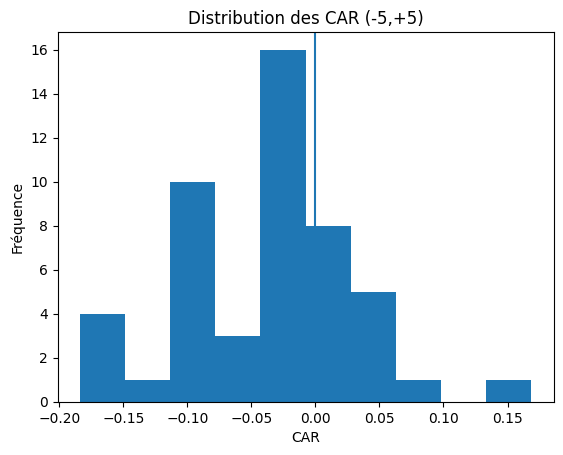

In [29]:
!python -m pip install matplotlib
import matplotlib.pyplot as plt

car = df_global["CAR_[-5,+5]"].dropna()

plt.figure()
plt.hist(car, bins=10)
plt.axvline(0)
plt.title("Distribution des CAR (-5,+5)")
plt.xlabel("CAR")
plt.ylabel("Fréquence")
plt.show()

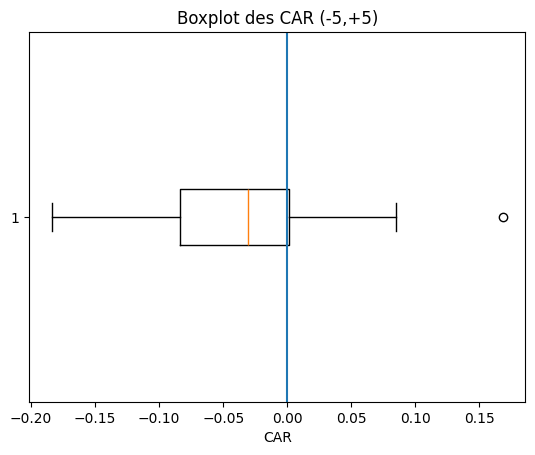

In [30]:
plt.figure()
plt.boxplot(car, vert=False)
plt.axvline(0)
plt.title("Boxplot des CAR (-5,+5)")
plt.xlabel("CAR")

#AUVEGARDE DE L'IMAGE
plt.savefig(
    "boxplot_CAR_-5_+5.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

In [31]:
def event_study_AR(
    ticker, event_date, market_returns,
    est_window=(-250,-30), event_window=(-5,5),
    lookback_days=900, post_days=60
):
    event_date = pd.to_datetime(event_date)

    prices = yf.download(
        ticker,
        start=event_date - pd.Timedelta(days=lookback_days),
        end=event_date + pd.Timedelta(days=post_days),
        progress=False,
        auto_adjust=True
    )["Close"].squeeze()

    if prices is None or len(prices)==0:
        return None

    ri = np.log(prices/prices.shift(1)).dropna().rename("Ri")
    rm = market_returns.dropna().rename("Rm")

    df_ret = pd.concat([ri, rm], axis=1).dropna()
    if df_ret.empty:
        return None

    pos = df_ret.index.searchsorted(event_date) - 1
    if pos < 0:
        return None
    i0 = pos

    est = df_ret.iloc[i0+est_window[0]:i0+est_window[1]+1]
    evt = df_ret.iloc[i0+event_window[0]:i0+event_window[1]+1]

    if len(est) < 120 or evt.empty:
        return None

    X = sm.add_constant(est["Rm"])
    model = sm.OLS(est["Ri"], X).fit()
    evt = evt.copy()
    evt["AR"] = evt["Ri"] - model.predict(sm.add_constant(evt["Rm"]))
    evt["t"] = range(event_window[0], event_window[1]+1)

    return evt[["t","AR"]]

In [32]:
ar_list = []

df_global["Date d’annonce"] = pd.to_datetime(df_global["Date d’annonce"])

for _, row in df_global.iterrows():
    res = event_study_AR(row["Ticker"], row["Date d’annonce"], market)
    if res is not None:
        ar_list.append(res)

ar_df = pd.concat(ar_list, ignore_index=True)
aar = ar_df.groupby("t")["AR"].mean()
caar = aar.cumsum()

/tmp/ipykernel_6123/2830594316.py:22: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  df_ret = pd.concat([ri, rm], axis=1).dropna()
/tmp/ipykernel_6123/2830594316.py:22: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  df_ret = pd.concat([ri, rm], axis=1).dropna()
/tmp/ipykernel_6123/2830594316.py:22: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence

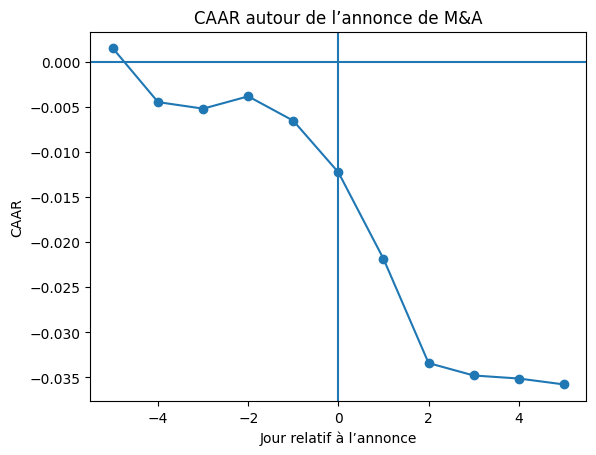

In [33]:
plt.figure()
plt.plot(caar.index, caar.values, marker='o')
plt.axhline(0)
plt.axvline(0)
plt.title("CAAR autour de l’annonce de M&A")
plt.xlabel("Jour relatif à l’annonce")
plt.ylabel("CAAR")

#SAUVEGARDE DE L'IMAGE
plt.savefig(
    "CAAR_autour_annonce_MA.png",
    dpi=300,
    bbox_inches="tight"
)

plt.show()

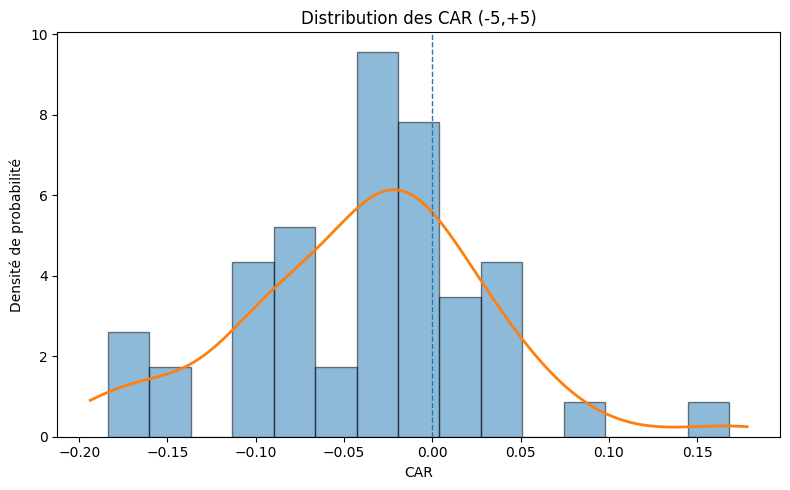

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# CAR
car = df_global["CAR_[-5,+5]"].dropna()

# Grille pour la densité
x_grid = np.linspace(car.min() - 0.01, car.max() + 0.01, 500)

# KDE
kde = gaussian_kde(car)
density = kde(x_grid)

plt.figure(figsize=(8, 5))

# Histogramme normalisé
plt.hist(
    car,
    bins=15,
    density=True,
    alpha=0.5,
    edgecolor='black'
)

# Densité lissée
plt.plot(x_grid, density, linewidth=2)

# Ligne verticale à 0
plt.axvline(0, linestyle='--', linewidth=1)

plt.title("Distribution des CAR (-5,+5)")
plt.xlabel("CAR")
plt.ylabel("Densité de probabilité")
plt.tight_layout()

# SAUVEGARDE DE L'IMAGE
plt.savefig(
    "distribution_CAR_-5_+5_densite.png",
    dpi=300,          # qualité impression
    bbox_inches="tight"
)

plt.show()

## Illustration de la méthode méthode :

Afin de rendre la démarche plus pédagogique, nous avons décidé d'appliquer l'analyse à une opération spécifique (acquisition de Slack par Salesforce).

Ce cas permet de visualiser la construction des rendements anormaux (AR) et du CAR sur la fenêtre événementielle, avant d’étendre la méthodologie à l’ensemble de l’échantillon.

In [35]:
import pandas as pd

df_global["Date d’annonce"] = pd.to_datetime(df_global["Date d’annonce"])

# filtre robuste : acquéreur contient Salesforce et cible contient Slack
mask = (
    df_global["Acquéreur"].astype(str).str.contains("Salesforce", case=False, na=False)
    & df_global["Cible"].astype(str).str.contains("Slack", case=False, na=False)
)

row = df_global.loc[mask].iloc[0]
row[["Acquéreur", "Ticker", "Cible", "Date d’annonce", "CAR_[-5,+5]"]]

Acquéreur             Salesforce Inc.
Ticker                            CRM
Cible              Slack Technologies
Date d’annonce    2020-12-01 00:00:00
CAR_[-5,+5]                 -0.183732
Name: 42, dtype: object

In [36]:
import numpy as np
import yfinance as yf
import statsmodels.api as sm

def event_study_case_one_deal(
    ticker: str,
    event_date,
    market_returns: pd.Series,
    est_window=(-250, -30),
    event_window=(-5, 5),
    min_est_obs=120,
    lookback_days=900,
    post_days=60
):
    event_date = pd.to_datetime(event_date)

    # Prices (adjusted)
    prices = yf.download(
        ticker,
        start=event_date - pd.Timedelta(days=lookback_days),
        end=event_date + pd.Timedelta(days=post_days),
        progress=False,
        auto_adjust=True
    )["Close"].squeeze()

    if prices is None or len(prices) == 0:
        return None

    ri = np.log(prices / prices.shift(1)).dropna()
    ri.name = "Ri"

    rm = market_returns.squeeze().dropna()
    rm.name = "Rm"

    df_ret = pd.concat([ri, rm], axis=1).dropna()
    if df_ret.empty:
        return None

    # Align event date to a trading day (previous trading day if needed)
    if event_date not in df_ret.index:
        pos = df_ret.index.searchsorted(event_date) - 1
        if pos < 0:
            return None
        event_idx = df_ret.index[pos]
    else:
        event_idx = event_date

    i0 = df_ret.index.get_loc(event_idx)

    est_start = i0 + est_window[0]
    est_end   = i0 + est_window[1]
    evt_start = i0 + event_window[0]
    evt_end   = i0 + event_window[1]

    if est_start < 0 or evt_start < 0 or evt_end >= len(df_ret):
        return None

    est = df_ret.iloc[est_start:est_end + 1]
    evt = df_ret.iloc[evt_start:evt_end + 1]

    if len(est) < min_est_obs or evt.empty:
        return None

    # Market model
    X = sm.add_constant(est["Rm"])
    model = sm.OLS(est["Ri"], X).fit()

    evt = evt.copy()
    evt["R_hat"] = model.predict(sm.add_constant(evt["Rm"]))
    evt["AR"] = evt["Ri"] - evt["R_hat"]

    # Relative day index for event window
    evt["t"] = np.arange(event_window[0], event_window[1] + 1)
    evt = evt.set_index("t")

    car = float(evt["AR"].sum())

    return {
        "event_date": event_date,
        "event_idx": event_idx,
        "alpha": float(model.params["const"]),
        "beta": float(model.params["Rm"]),
        "car": car,
        "evt_df": evt,      # index t, columns: Ri, Rm, R_hat, AR
        "df_ret": df_ret,   # full aligned returns by date
        "model": model
    }

In [37]:
case = event_study_case_one_deal(
    ticker=row["Ticker"],
    event_date=row["Date d’annonce"],
    market_returns=market
)

case["alpha"], case["beta"], case["car"]

/tmp/ipykernel_6123/3354595735.py:35: Pandas4Warning: Sorting by default when concatenating all DatetimeIndex is deprecated.  In the future, pandas will respect the default of `sort=False`. Specify `sort=True` or `sort=False` to silence this message. If you see this warnings when not directly calling concat, report a bug to pandas.
  df_ret = pd.concat([ri, rm], axis=1).dropna()


(0.0015765684580631408, 1.053554154731086, -0.18373215315412592)

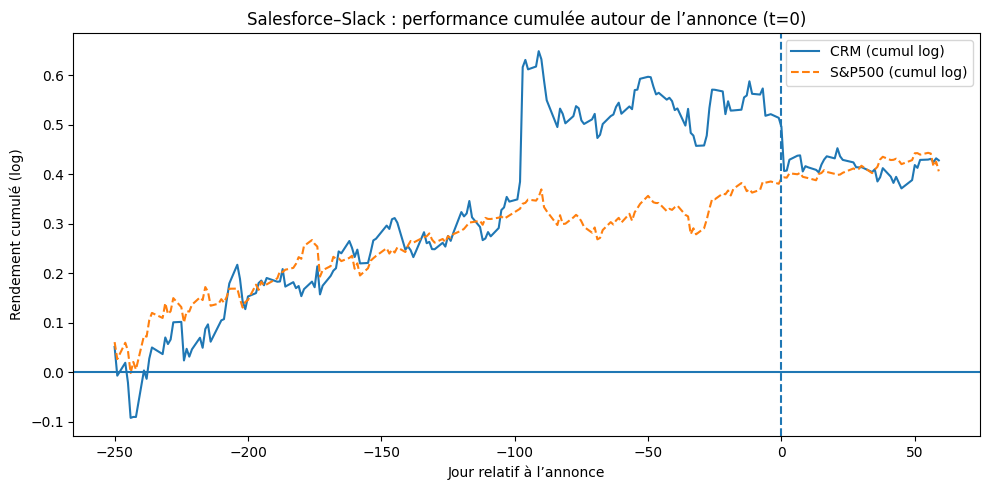

In [38]:
import matplotlib.pyplot as plt

df_ret = case["df_ret"].copy()
event_idx = case["event_idx"]

# Jours relatifs sur toute la période dispo
df_ret["t"] = (df_ret.index.normalize() - event_idx.normalize()).days
df_ret = df_ret.set_index("t").sort_index()

# Fenêtre large pour le storytelling (modifiable)
win_start, win_end = -250, 60
df_win = df_ret.loc[win_start:win_end].copy()

df_win["Cum_Ri"] = df_win["Ri"].cumsum()
df_win["Cum_Rm"] = df_win["Rm"].cumsum()

plt.figure(figsize=(10, 5))
plt.plot(df_win.index, df_win["Cum_Ri"].values, label=f"{row['Ticker']} (cumul log)")
plt.plot(df_win.index, df_win["Cum_Rm"].values, linestyle="--", label="S&P500 (cumul log)")
plt.axvline(0, linestyle="--")
plt.axhline(0)
plt.title(f"Salesforce–Slack : performance cumulée autour de l’annonce (t=0)")
plt.xlabel("Jour relatif à l’annonce")
plt.ylabel("Rendement cumulé (log)")
plt.legend()
plt.tight_layout()
plt.savefig("case_salesforce_slack_performance_cumulee.png", dpi=300, bbox_inches="tight")
plt.show()

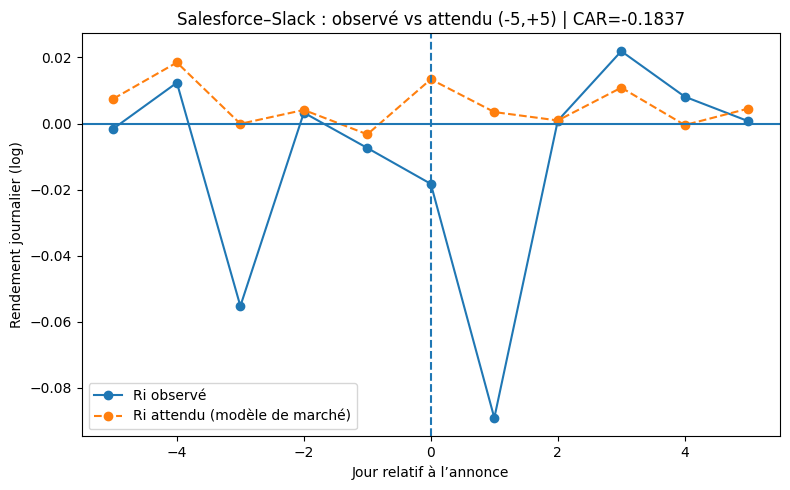

In [39]:
evt = case["evt_df"]

plt.figure(figsize=(8, 5))
plt.plot(evt.index, evt["Ri"].values, marker="o", label="Ri observé")
plt.plot(evt.index, evt["R_hat"].values, marker="o", linestyle="--", label="Ri attendu (modèle de marché)")
plt.axvline(0, linestyle="--")
plt.axhline(0)
plt.title(f"Salesforce–Slack : observé vs attendu (-5,+5) | CAR={case['car']:.4f}")
plt.xlabel("Jour relatif à l’annonce")
plt.ylabel("Rendement journalier (log)")
plt.legend()
plt.tight_layout()
plt.savefig("case_salesforce_slack_observe_vs_attendu.png", dpi=300, bbox_inches="tight")
plt.show()

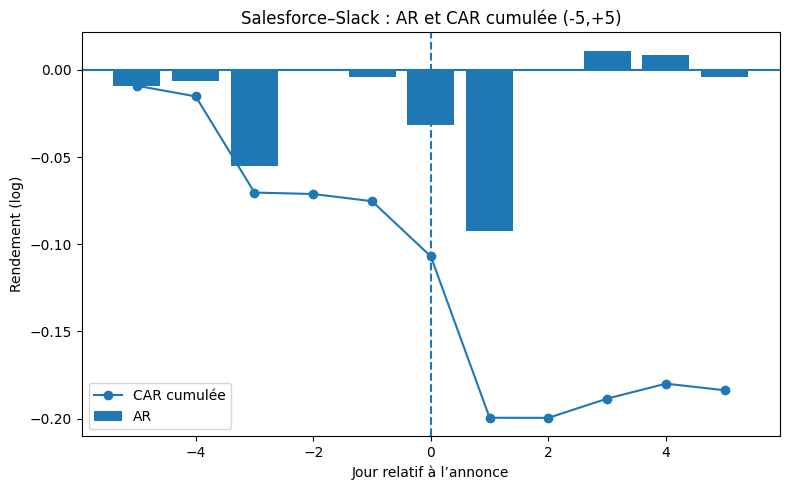

In [40]:
evt2 = evt.copy()
evt2["CAR_cum"] = evt2["AR"].cumsum()

plt.figure(figsize=(8, 5))
plt.bar(evt2.index, evt2["AR"].values, label="AR")
plt.plot(evt2.index, evt2["CAR_cum"].values, marker="o", label="CAR cumulée")
plt.axvline(0, linestyle="--")
plt.axhline(0)
plt.title("Salesforce–Slack : AR et CAR cumulée (-5,+5)")
plt.xlabel("Jour relatif à l’annonce")
plt.ylabel("Rendement (log)")
plt.legend()
plt.tight_layout()
plt.savefig("case_salesforce_slack_AR_CAR.png", dpi=300, bbox_inches="tight")
plt.show()

Étude économétrique 

Une fois l'event study et le calcul des CAR effectué, il est intéréssent d'analyser la raison de cette baisse/hausse lié à un deal M&A. Pour cela, nous avons réalisé la régression suivante (OLS) avec : 
Variable dépendante (expliquée) : CAR


FileNotFoundError: [Errno 2] No such file or directory: 'regression2.csv'